In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)
# Path to the folder containing the datasets
folder_path = 'Datasets/World Bank'

# Initialize an empty DataFrame to collect all data
final_df = None

# Loop through each file in the directory
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        
        # Read each CSV file, assuming the first four rows are headers and need to be skipped
        df = pd.read_csv(file_path, skiprows=4)
        # Check if 'Country Name' and 'Indicator Name' are in columns
        if 'Country Name' in df.columns and 'Indicator Name' in df.columns:
            # Get the name of the indicator for this dataset
            indicator_name = df.at[0, 'Indicator Name']
            
            # Filter columns for 'Country Name' and all years
            cols_to_keep = ['Country Name'] + [col for col in df.columns if col.isdigit()]
            df = df[cols_to_keep]
            
            # Reshape the DataFrame
            df_reshaped = pd.melt(df, id_vars='Country Name', var_name='Year', value_name=indicator_name)
            #print(df_reshaped.shape)
            # If final_df is not initialized, initialize it with the first reshaped DataFrame
            if final_df is None:
                final_df = df_reshaped
            else:
                # Merge the new DataFrame with the existing final_df on 'Country Name' and 'Year'
                final_df = pd.merge(final_df, df_reshaped, on=['Country Name', 'Year'], how='outer')


final_df

,Country Name,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),People using safely managed drinking water services (% of population),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",CO2 emissions (metric tons per capita),GDP (current US$),GNI (current US$),Current health expenditure per capita (current US$),"Immunization, DPT (% of children ages 12-23 months)","Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)","Life expectancy at birth, total (years)","Hospital beds (per 1,000 people)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)","Mortality caused by road traffic injury (per 100,000 population)","Mortality rate, under-5 (per 1,000 live births)","Physicians (per 1,000 people)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Population, total",Poverty headcount ratio at societal poverty line (% of population),Prevalence of current tobacco use (% of adults),Prevalence of undernourishment (% of population),People using safely managed sanitation services (% of population),"Suicide mortality rate (per 100,000 population)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Aruba,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.152,NaN,NaN,162.457,304.947,NaN,NaN,NaN,NaN,54608.000,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,1960,NaN,NaN,NaN,NaN,NaN,18478095142.178,17132619494.265,NaN,NaN,NaN,NaN,44.086,1.966,NaN,384.245,448.240,NaN,NaN,NaN,NaN,130692579.000,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1960,NaN,NaN,NaN,NaN,NaN,537777811.111,548888848.889,NaN,NaN,NaN,NaN,32.535,0.171,NaN,550.189,601.887,NaN,357.300,0.035,NaN,8622466.000,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,1960,NaN,NaN,NaN,NaN,NaN,10411646287.306,NaN,NaN,NaN,NaN,NaN,37.845,0.786,NaN,429.524,492.572,NaN,NaN,NaN,NaN,97256290.000,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.211,2.061,NaN,417.058,473.846,NaN,NaN,0.067,NaN,5357195.000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17019,Kosovo,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17020,"Yemen, Rep.",2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.533
17021,South Africa,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.396
17022,Zambia,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.220


In [3]:
print(final_df.dtypes)

Country Name                                                                                             object
Year                                                                                                     object
Access to clean fuels and technologies for cooking (% of population)                                    float64
Access to electricity (% of population)                                                                 float64
People using safely managed drinking water services (% of population)                                   float64
Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)    float64
CO2 emissions (metric tons per capita)                                                                  float64
GDP (current US$)                                                                                       float64
GNI (current US$)                                                                                       

In [4]:
final_df['Year'] = final_df['Year'].astype(int)
print(final_df[['Country Name', 'Year']].nunique())

Country Name    266
Year             64
dtype: int64


In [5]:
final_df = final_df.dropna(subset=['Life expectancy at birth, total (years)'])
final_df.reset_index(drop=True, inplace=True)
final_df

,Country Name,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),People using safely managed drinking water services (% of population),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",CO2 emissions (metric tons per capita),GDP (current US$),GNI (current US$),Current health expenditure per capita (current US$),"Immunization, DPT (% of children ages 12-23 months)","Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)","Life expectancy at birth, total (years)","Hospital beds (per 1,000 people)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)","Mortality caused by road traffic injury (per 100,000 population)","Mortality rate, under-5 (per 1,000 live births)","Physicians (per 1,000 people)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Population, total",Poverty headcount ratio at societal poverty line (% of population),Prevalence of current tobacco use (% of adults),Prevalence of undernourishment (% of population),People using safely managed sanitation services (% of population),"Suicide mortality rate (per 100,000 population)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Aruba,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.152,NaN,NaN,162.457,304.947,NaN,NaN,NaN,NaN,54608.000,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,1960,NaN,NaN,NaN,NaN,NaN,18478095142.178,17132619494.265,NaN,NaN,NaN,NaN,44.086,1.966,NaN,384.245,448.240,NaN,NaN,NaN,NaN,130692579.000,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1960,NaN,NaN,NaN,NaN,NaN,537777811.111,548888848.889,NaN,NaN,NaN,NaN,32.535,0.171,NaN,550.189,601.887,NaN,357.300,0.035,NaN,8622466.000,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,1960,NaN,NaN,NaN,NaN,NaN,10411646287.306,NaN,NaN,NaN,NaN,NaN,37.845,0.786,NaN,429.524,492.572,NaN,NaN,NaN,NaN,97256290.000,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.211,2.061,NaN,417.058,473.846,NaN,NaN,0.067,NaN,5357195.000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15861,Kosovo,2021,NaN,NaN,NaN,NaN,NaN,9412034299.231,9591067403.644,NaN,NaN,NaN,NaN,76.806,NaN,NaN,57.571,110.771,NaN,10.000,NaN,NaN,1786038.000,NaN,NaN,NaN,NaN,NaN,NaN
15862,"Yemen, Rep.",2021,61.300,74.877,NaN,NaN,NaN,NaN,NaN,NaN,72.000,72.000,71.000,63.753,NaN,NaN,171.918,294.032,NaN,61.900,NaN,NaN,32981641.000,NaN,NaN,34.500,19.101,NaN,18.647
15863,South Africa,2021,88.400,89.300,NaN,NaN,NaN,420117812463.841,412089092136.658,NaN,86.000,86.000,87.000,62.341,NaN,NaN,294.817,399.441,NaN,32.800,0.809,NaN,59392255.000,NaN,NaN,7.900,70.992,NaN,28.770
15864,Zambia,2021,10.200,46.685,NaN,NaN,NaN,22096416933.790,22096425169.395,NaN,91.000,91.000,90.000,61.223,NaN,NaN,250.213,368.647,NaN,57.700,0.297,NaN,19473125.000,NaN,NaN,29.800,NaN,NaN,5.200


In [6]:
final_df['Country Name'].unique()


array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Arab World',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'East Asia & Pacific (excluding high income)',
 

In [7]:
not_country = [
    "Africa Eastern and Southern",
    "Africa Western and Central",
    "Arab World",
    "Central Europe and the Baltics",
    "Caribbean small states",
    "East Asia & Pacific (excluding high income)",
    "Early-demographic dividend",
    "East Asia & Pacific",
    "Europe & Central Asia (excluding high income)",
    "Europe & Central Asia",
    "Euro area",
    "European Union",
    "Fragile and conflict affected situations",
    "High income",
    "Heavily indebted poor countries (HIPC)",
    "IBRD only",
    "IDA & IBRD total",
    "IDA total",
    "IDA blend",
    "IDA only",
    "Latin America & Caribbean (excluding high income)",
    "Latin America & Caribbean",
    "Least developed countries: UN classification",
    "Low income",
    "Lower middle income",
    "Low & middle income",
    "Late-demographic dividend",
    "Middle East & North Africa",
    "Middle income",
    "Middle East & North Africa (excluding high income)",
    "North America",
    "OECD members",
    "Other small states",
    "Pacific island small states",
    "Pre-demographic dividend",
    "Post-demographic dividend",
    "Small states",
    "Sub-Saharan Africa (excluding high income)",
    "Sub-Saharan Africa",
    "East Asia & Pacific (IDA & IBRD countries)",
    "Europe & Central Asia (IDA & IBRD countries)",
    "Latin America & the Caribbean (IDA & IBRD countries)",
    "Middle East & North Africa (IDA & IBRD countries)",
    "South Asia (IDA & IBRD)",
    "South Asia",
    "Sub-Saharan Africa (IDA & IBRD countries)",
    "Upper middle income",
    "World"
]
final_df = final_df[~final_df['Country Name'].isin(not_country)]
final_df['Country Name'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cabo Verde', 'Costa Rica', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt, Arab Rep.', 'Eritrea', 'Spain',
       'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', '

In [8]:
nan_colcounts = final_df.isna().sum()/final_df.shape[0] * 100
print(nan_colcounts)

Country Name                                                                                            0.000
Year                                                                                                    0.000
Access to clean fuels and technologies for cooking (% of population)                                   68.410
Access to electricity (% of population)                                                                54.182
People using safely managed drinking water services (% of population)                                  77.773
Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)   92.816
CO2 emissions (metric tons per capita)                                                                 54.554
GDP (current US$)                                                                                      22.459
GNI (current US$)                                                                                      27.424
Current he

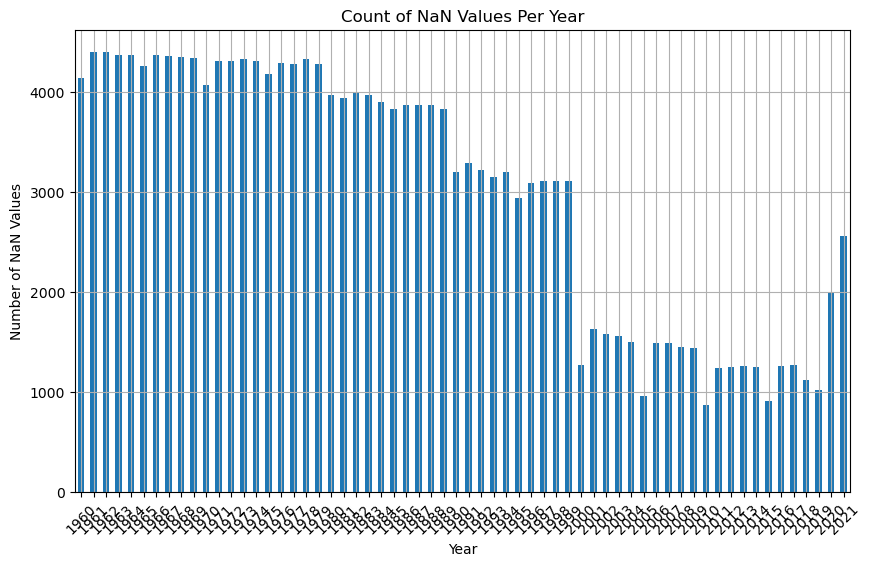

In [9]:
nan_yearcounts = final_df.isna().groupby(final_df['Year']).sum()
plt.figure(figsize=(10, 6))
nan_yearcounts.sum(axis=1).plot(kind='bar')  # Summing NaN counts across all columns for each year
plt.title('Count of NaN Values Per Year')
plt.xlabel('Year')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [10]:
final_df = final_df[(final_df['Year'] >= 2000) & (final_df['Year'] <= 2019)]
final_df

,Country Name,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),People using safely managed drinking water services (% of population),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",CO2 emissions (metric tons per capita),GDP (current US$),GNI (current US$),Current health expenditure per capita (current US$),"Immunization, DPT (% of children ages 12-23 months)","Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)","Life expectancy at birth, total (years)","Hospital beds (per 1,000 people)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)","Mortality caused by road traffic injury (per 100,000 population)","Mortality rate, under-5 (per 1,000 live births)","Physicians (per 1,000 people)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Population, total",Poverty headcount ratio at societal poverty line (% of population),Prevalence of current tobacco use (% of adults),Prevalence of undernourishment (% of population),People using safely managed sanitation services (% of population),"Suicide mortality rate (per 100,000 population)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
10192,Aruba,2000,NaN,91.660,NaN,NaN,NaN,1873452513.966,1849411062.795,NaN,NaN,NaN,NaN,73.569,NaN,NaN,84.781,169.694,NaN,NaN,NaN,NaN,89101.000,NaN,NaN,NaN,NaN,NaN,NaN
10194,Afghanistan,2000,6.700,4.447,11.093,0.003,0.055,NaN,NaN,NaN,24.000,NaN,27.000,55.298,0.300,41.700,290.083,355.447,14.700,129.300,NaN,51.555,19542982.000,NaN,36.900,NaN,NaN,4.900,7.942
10196,Angola,2000,40.100,24.239,NaN,5.186,0.988,9129594815.577,7448734812.946,13.000,31.000,NaN,32.000,46.024,NaN,28.600,360.010,469.150,25.100,205.100,NaN,28.134,16394062.000,37.200,NaN,NaN,NaN,8.700,16.562
10197,Albania,2000,38.700,99.431,49.138,4.431,1.032,3480355258.041,3585007221.821,65.150,97.000,96.000,95.000,75.404,3.260,18.700,58.575,110.606,14.300,27.200,1.359,24.303,3089027.000,NaN,35.000,NaN,26.567,4.900,19.028
10199,United Arab Emirates,2000,100.000,100.000,NaN,1.760,25.869,104337372362.151,109429271613.342,753.076,94.000,92.000,94.000,74.380,2.380,24.400,105.960,133.120,16.000,11.100,1.724,43.648,3275333.000,NaN,NaN,NaN,98.440,8.600,2.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15347,Kosovo,2019,NaN,NaN,NaN,NaN,NaN,7899737577.473,8079554129.888,NaN,NaN,NaN,NaN,79.022,NaN,NaN,51.535,91.812,NaN,11.200,NaN,NaN,1788878.000,NaN,NaN,NaN,NaN,NaN,NaN
15348,"Yemen, Rep.",2019,61.400,72.777,NaN,0.028,0.355,NaN,NaN,NaN,73.000,73.000,67.000,65.092,NaN,27.600,153.203,277.880,29.400,61.600,NaN,44.467,31546691.000,NaN,20.500,38.900,18.568,5.800,17.350
15349,South Africa,2019,87.100,85.000,NaN,8.766,7.689,389330032221.070,379611912078.734,550.480,85.000,85.000,83.000,66.175,NaN,24.100,236.101,341.836,22.200,34.300,0.799,28.675,58087055.000,NaN,20.400,6.100,69.540,23.500,25.540
15350,Zambia,2019,11.500,43.000,NaN,3.852,0.414,23308667781.226,22904080806.827,67.458,88.000,88.000,93.000,62.793,NaN,24.600,219.249,321.702,20.500,62.600,0.239,25.925,18380477.000,NaN,14.600,29.200,NaN,7.300,5.540


In [11]:
nan_colcounts = final_df.isna().sum()/final_df.shape[0] * 100
print(nan_colcounts)

Country Name                                                                                            0.000
Year                                                                                                    0.000
Access to clean fuels and technologies for cooking (% of population)                                   11.857
Access to electricity (% of population)                                                                 1.071
People using safely managed drinking water services (% of population)                                  37.976
Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)   77.952
CO2 emissions (metric tons per capita)                                                                  9.952
GDP (current US$)                                                                                       4.071
GNI (current US$)                                                                                       7.048
Current he

10192   68.966
10194   27.586
10196   24.138
10197    6.897
10199   13.793
         ...  
15347   68.966
15348   24.138
15349   10.345
15350   13.793
15351    6.897
Length: 4200, dtype: float64


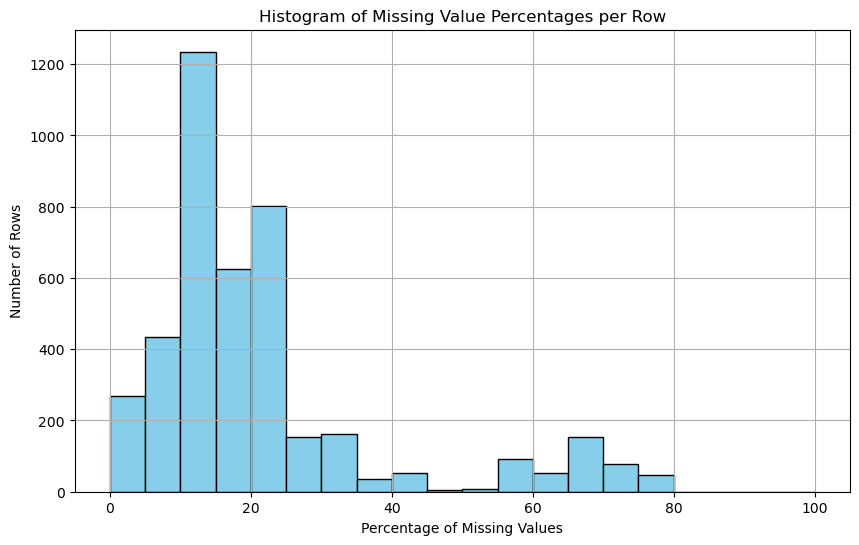

In [12]:
nan_rowcounts = final_df.isna().sum(axis=1)/final_df.shape[1] * 100
print(nan_rowcounts)
plt.figure(figsize=(10, 6))
plt.hist(nan_rowcounts, bins=list(range(0, 101, 5)), color='skyblue', edgecolor='black')
plt.title('Histogram of Missing Value Percentages per Row')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Number of Rows')
plt.grid(True)
plt.show()

In [13]:
final_df = final_df[nan_rowcounts < 25].copy()
final_df

,Country Name,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),People using safely managed drinking water services (% of population),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",CO2 emissions (metric tons per capita),GDP (current US$),GNI (current US$),Current health expenditure per capita (current US$),"Immunization, DPT (% of children ages 12-23 months)","Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)","Life expectancy at birth, total (years)","Hospital beds (per 1,000 people)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)","Mortality caused by road traffic injury (per 100,000 population)","Mortality rate, under-5 (per 1,000 live births)","Physicians (per 1,000 people)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Population, total",Poverty headcount ratio at societal poverty line (% of population),Prevalence of current tobacco use (% of adults),Prevalence of undernourishment (% of population),People using safely managed sanitation services (% of population),"Suicide mortality rate (per 100,000 population)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
10196,Angola,2000,40.100,24.239,NaN,5.186,0.988,9129594815.577,7448734812.946,13.000,31.000,NaN,32.000,46.024,NaN,28.600,360.010,469.150,25.100,205.100,NaN,28.134,16394062.000,37.200,NaN,NaN,NaN,8.700,16.562
10197,Albania,2000,38.700,99.431,49.138,4.431,1.032,3480355258.041,3585007221.821,65.150,97.000,96.000,95.000,75.404,3.260,18.700,58.575,110.606,14.300,27.200,1.359,24.303,3089027.000,NaN,35.000,NaN,26.567,4.900,19.028
10199,United Arab Emirates,2000,100.000,100.000,NaN,1.760,25.869,104337372362.151,109429271613.342,753.076,94.000,92.000,94.000,74.380,2.380,24.400,105.960,133.120,16.000,11.100,1.724,43.648,3275333.000,NaN,NaN,NaN,98.440,8.600,2.250
10200,Argentina,2000,95.800,95.680,NaN,6.730,3.568,284203750000.000,276655968900.000,704.946,83.000,NaN,91.000,73.926,4.100,20.400,102.208,176.243,11.500,19.700,NaN,14.164,37070774.000,30.900,34.000,NaN,44.713,9.100,15.000
10201,Armenia,2000,80.100,98.900,82.351,3.713,1.124,1911563668.850,1970535935.803,25.313,93.000,55.000,92.000,70.624,6.440,26.700,101.019,220.374,19.600,30.700,2.616,31.074,3168523.000,NaN,32.000,NaN,14.827,3.400,11.023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15346,Samoa,2019,35.300,99.200,62.076,2.391,1.315,912950466.065,877132815.607,239.132,68.000,68.000,96.000,72.157,NaN,31.200,114.303,178.682,13.000,17.500,NaN,11.015,211905.000,NaN,25.900,7.400,44.535,12.600,9.584
15348,"Yemen, Rep.",2019,61.400,72.777,NaN,0.028,0.355,NaN,NaN,NaN,73.000,73.000,67.000,65.092,NaN,27.600,153.203,277.880,29.400,61.600,NaN,44.467,31546691.000,NaN,20.500,38.900,18.568,5.800,17.350
15349,South Africa,2019,87.100,85.000,NaN,8.766,7.689,389330032221.070,379611912078.734,550.480,85.000,85.000,83.000,66.175,NaN,24.100,236.101,341.836,22.200,34.300,0.799,28.675,58087055.000,NaN,20.400,6.100,69.540,23.500,25.540
15350,Zambia,2019,11.500,43.000,NaN,3.852,0.414,23308667781.226,22904080806.827,67.458,88.000,88.000,93.000,62.793,NaN,24.600,219.249,321.702,20.500,62.600,0.239,25.925,18380477.000,NaN,14.600,29.200,NaN,7.300,5.540


In [14]:
final_df.sort_values(by=['Country Name', 'Year'], inplace=True)

# List of columns not to interpolate
exclude_columns = ['Country Name', 'Year', 'Life expectancy at birth, total (years)']

# Iterate over each column that needs interpolation
for attribute in final_df.columns:
    if attribute not in exclude_columns:
        # Interpolate per group, ensuring the result aligns with the original DataFrame index
        final_df.loc[:,attribute] = final_df.groupby('Country Name')[attribute].transform(lambda group: group.interpolate())


nan_colcounts = final_df.isna().sum()/final_df.shape[0] * 100
print(nan_colcounts)

Country Name                                                                                            0.000
Year                                                                                                    0.000
Access to clean fuels and technologies for cooking (% of population)                                    1.725
Access to electricity (% of population)                                                                 0.059
People using safely managed drinking water services (% of population)                                  30.874
Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)    0.476
CO2 emissions (metric tons per capita)                                                                  0.000
GDP (current US$)                                                                                       0.149
GNI (current US$)                                                                                       0.684
Current he

In [15]:
for attribute in final_df.columns:
    if attribute not in exclude_columns:
        # Use direct methods ffill() and bfill() and ensure the index aligns with the DataFrame
        final_df.loc[:,attribute] = final_df.groupby('Country Name')[attribute].transform(
            lambda group: group.ffill().bfill()
        )
nan_colcounts = final_df.isna().sum()/final_df.shape[0] * 100
print(nan_colcounts)

Country Name                                                                                            0.000
Year                                                                                                    0.000
Access to clean fuels and technologies for cooking (% of population)                                    1.725
Access to electricity (% of population)                                                                 0.000
People using safely managed drinking water services (% of population)                                  30.518
Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)    0.000
CO2 emissions (metric tons per capita)                                                                  0.000
GDP (current US$)                                                                                       0.119
GNI (current US$)                                                                                       0.119
Current he

In [16]:
number_of_countries = final_df['Country Name'].nunique()
number_of_countries

183

In [17]:
attribute_name = 'People using safely managed drinking water services (% of population)' 

countries_no_data = final_df.groupby('Country Name')[attribute_name].apply(lambda x: x.isna().all())

countries_no_data = countries_no_data[countries_no_data]

countries_no_data.shape[0] / number_of_countries * 100

34.42622950819672

In [18]:
attribute_name = 'Poverty headcount ratio at societal poverty line (% of population)' 

countries_no_data = final_df.groupby('Country Name')[attribute_name].apply(lambda x: x.isna().all())

countries_no_data = countries_no_data[countries_no_data]

countries_no_data.shape[0] / number_of_countries * 100

14.207650273224044

In [19]:
attribute_name = 'People using safely managed sanitation services (% of population)' 

countries_no_data = final_df.groupby('Country Name')[attribute_name].apply(lambda x: x.isna().all())

countries_no_data = countries_no_data[countries_no_data]

countries_no_data.shape[0] / number_of_countries * 100

31.147540983606557

In [20]:
attribute_name = 'Prevalence of current tobacco use (% of adults)' 

countries_no_data = final_df.groupby('Country Name')[attribute_name].apply(lambda x: x.isna().all())

countries_no_data = countries_no_data[countries_no_data]

countries_no_data.shape[0] / number_of_countries * 100

13.114754098360656

In [21]:
final_df = final_df.loc[:,nan_colcounts < 10].copy()
final_df

,Country Name,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",CO2 emissions (metric tons per capita),GDP (current US$),GNI (current US$),Current health expenditure per capita (current US$),"Immunization, DPT (% of children ages 12-23 months)","Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)","Life expectancy at birth, total (years)","Hospital beds (per 1,000 people)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)","Mortality caused by road traffic injury (per 100,000 population)","Mortality rate, under-5 (per 1,000 live births)","Physicians (per 1,000 people)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Population, total",Prevalence of undernourishment (% of population),"Suicide mortality rate (per 100,000 population)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
11485,Afghanistan,2005,12.500,28.670,0.027,0.080,6203256497.090,10107195903.417,25.107,58.000,63.000,50.000,58.361,0.420,40.900,259.868,310.940,15.200,108.600,0.166,46.152,24411191.000,34.500,5.000,7.925
11744,Afghanistan,2006,13.900,33.544,0.024,0.090,6971758332.889,10107195903.417,28.920,58.000,63.000,53.000,58.684,0.420,40.500,254.511,314.837,15.100,104.300,0.166,47.286,25442944.000,31.900,4.900,7.925
12002,Afghanistan,2007,15.300,38.440,0.021,0.110,9747886104.533,10107195903.417,32.717,63.000,63.000,55.000,59.111,0.420,40.100,247.960,318.012,15.000,100.000,0.182,48.420,25903301.000,28.600,4.800,7.924
12260,Afghanistan,2008,16.800,42.400,0.018,0.166,10109296957.657,10107195903.417,39.970,64.000,64.000,59.000,59.852,0.420,39.400,241.256,305.060,15.000,95.900,0.183,49.554,26427199.000,25.400,4.600,7.928
12518,Afghanistan,2009,18.200,48.279,0.015,0.240,12416152648.057,12378340846.019,43.261,63.000,63.000,60.000,60.364,0.420,38.400,236.917,293.605,14.400,91.800,0.220,50.688,27385307.000,22.200,4.400,7.923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14321,Zimbabwe,2015,30.000,33.700,3.748,0.847,19963120600.000,17604879500.000,105.098,87.000,87.000,86.000,59.591,1.700,31.100,338.869,419.827,38.700,60.500,0.177,25.929,14154937.000,32.600,18.000,5.412
14579,Zimbabwe,2016,30.000,42.466,3.718,0.723,20548678100.000,18002592300.000,106.190,90.000,90.000,95.000,60.306,1.700,30.400,325.287,409.210,39.900,57.900,0.174,25.327,14452704.000,35.100,16.800,5.918
14837,Zimbabwe,2017,29.800,43.979,3.688,0.663,17584890936.652,15593754986.437,92.254,89.000,89.000,90.000,60.709,1.700,29.300,315.150,405.925,40.100,56.200,0.179,22.582,14751101.000,36.300,15.000,6.349
15094,Zimbabwe,2018,30.000,45.400,3.658,0.735,34156069918.061,33442898974.535,114.634,89.000,89.000,88.000,61.414,1.700,28.500,304.769,391.373,40.600,53.700,0.201,22.086,15052184.000,38.200,14.000,6.767


In [22]:
print(final_df.isna().any(axis=1).sum())

432


In [23]:
final_df.dropna(inplace=True)
final_df.reset_index(drop=True, inplace=True)
final_df

,Country Name,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",CO2 emissions (metric tons per capita),GDP (current US$),GNI (current US$),Current health expenditure per capita (current US$),"Immunization, DPT (% of children ages 12-23 months)","Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)","Life expectancy at birth, total (years)","Hospital beds (per 1,000 people)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)","Mortality caused by road traffic injury (per 100,000 population)","Mortality rate, under-5 (per 1,000 live births)","Physicians (per 1,000 people)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Population, total",Prevalence of undernourishment (% of population),"Suicide mortality rate (per 100,000 population)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,2005,12.500,28.670,0.027,0.080,6203256497.090,10107195903.417,25.107,58.000,63.000,50.000,58.361,0.420,40.900,259.868,310.940,15.200,108.600,0.166,46.152,24411191.000,34.500,5.000,7.925
1,Afghanistan,2006,13.900,33.544,0.024,0.090,6971758332.889,10107195903.417,28.920,58.000,63.000,53.000,58.684,0.420,40.500,254.511,314.837,15.100,104.300,0.166,47.286,25442944.000,31.900,4.900,7.925
2,Afghanistan,2007,15.300,38.440,0.021,0.110,9747886104.533,10107195903.417,32.717,63.000,63.000,55.000,59.111,0.420,40.100,247.960,318.012,15.000,100.000,0.182,48.420,25903301.000,28.600,4.800,7.924
3,Afghanistan,2008,16.800,42.400,0.018,0.166,10109296957.657,10107195903.417,39.970,64.000,64.000,59.000,59.852,0.420,39.400,241.256,305.060,15.000,95.900,0.183,49.554,26427199.000,25.400,4.600,7.928
4,Afghanistan,2009,18.200,48.279,0.015,0.240,12416152648.057,12378340846.019,43.261,63.000,63.000,60.000,60.364,0.420,38.400,236.917,293.605,14.400,91.800,0.220,50.688,27385307.000,22.200,4.400,7.923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Zimbabwe,2015,30.000,33.700,3.748,0.847,19963120600.000,17604879500.000,105.098,87.000,87.000,86.000,59.591,1.700,31.100,338.869,419.827,38.700,60.500,0.177,25.929,14154937.000,32.600,18.000,5.412
2926,Zimbabwe,2016,30.000,42.466,3.718,0.723,20548678100.000,18002592300.000,106.190,90.000,90.000,95.000,60.306,1.700,30.400,325.287,409.210,39.900,57.900,0.174,25.327,14452704.000,35.100,16.800,5.918
2927,Zimbabwe,2017,29.800,43.979,3.688,0.663,17584890936.652,15593754986.437,92.254,89.000,89.000,90.000,60.709,1.700,29.300,315.150,405.925,40.100,56.200,0.179,22.582,14751101.000,36.300,15.000,6.349
2928,Zimbabwe,2018,30.000,45.400,3.658,0.735,34156069918.061,33442898974.535,114.634,89.000,89.000,88.000,61.414,1.700,28.500,304.769,391.373,40.600,53.700,0.201,22.086,15052184.000,38.200,14.000,6.767


In [24]:
nan_colcounts = final_df.isna().sum()/final_df.shape[0] * 100
print(nan_colcounts)

Country Name                                                                                           0.000
Year                                                                                                   0.000
Access to clean fuels and technologies for cooking (% of population)                                   0.000
Access to electricity (% of population)                                                                0.000
Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)   0.000
CO2 emissions (metric tons per capita)                                                                 0.000
GDP (current US$)                                                                                      0.000
GNI (current US$)                                                                                      0.000
Current health expenditure per capita (current US$)                                                    0.000
Immunization, DPT (

In [25]:
final_df.head()

,Country Name,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",CO2 emissions (metric tons per capita),GDP (current US$),GNI (current US$),Current health expenditure per capita (current US$),"Immunization, DPT (% of children ages 12-23 months)","Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)","Life expectancy at birth, total (years)","Hospital beds (per 1,000 people)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)","Mortality caused by road traffic injury (per 100,000 population)","Mortality rate, under-5 (per 1,000 live births)","Physicians (per 1,000 people)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Population, total",Prevalence of undernourishment (% of population),"Suicide mortality rate (per 100,000 population)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,2005,12.500,28.670,0.027,0.080,6203256497.090,10107195903.417,25.107,58.000,63.000,50.000,58.361,0.420,40.900,259.868,310.940,15.200,108.600,0.166,46.152,24411191.000,34.500,5.000,7.925
1,Afghanistan,2006,13.900,33.544,0.024,0.090,6971758332.889,10107195903.417,28.920,58.000,63.000,53.000,58.684,0.420,40.500,254.511,314.837,15.100,104.300,0.166,47.286,25442944.000,31.900,4.900,7.925
2,Afghanistan,2007,15.300,38.440,0.021,0.110,9747886104.533,10107195903.417,32.717,63.000,63.000,55.000,59.111,0.420,40.100,247.960,318.012,15.000,100.000,0.182,48.420,25903301.000,28.600,4.800,7.924
3,Afghanistan,2008,16.800,42.400,0.018,0.166,10109296957.657,10107195903.417,39.970,64.000,64.000,59.000,59.852,0.420,39.400,241.256,305.060,15.000,95.900,0.183,49.554,26427199.000,25.400,4.600,7.928
4,Afghanistan,2009,18.200,48.279,0.015,0.240,12416152648.057,12378340846.019,43.261,63.000,63.000,60.000,60.364,0.420,38.400,236.917,293.605,14.400,91.800,0.220,50.688,27385307.000,22.200,4.400,7.923


In [26]:
duplicateCount = final_df.groupby(final_df.columns.tolist(),as_index=False).size()
duplicateCount.loc[duplicateCount['size']> 1]

,Country Name,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",CO2 emissions (metric tons per capita),GDP (current US$),GNI (current US$),Current health expenditure per capita (current US$),"Immunization, DPT (% of children ages 12-23 months)","Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)","Life expectancy at birth, total (years)","Hospital beds (per 1,000 people)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)","Mortality caused by road traffic injury (per 100,000 population)","Mortality rate, under-5 (per 1,000 live births)","Physicians (per 1,000 people)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Population, total",Prevalence of undernourishment (% of population),"Suicide mortality rate (per 100,000 population)","Unemployment, total (% of total labor force) (modeled ILO estimate)",size


In [27]:
final_df.to_csv('Datasets/World Bank Cleaned/Life Expectancy World Bank.csv', index=False)